<a href="https://colab.research.google.com/github/shamanth1998/ANN/blob/main/ANN_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df=pd.read_csv(url,delim_whitespace=True,names=names)

In [ ]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
summary=df.describe()

In [ ]:
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scale_df=mc.fit_transform(df)
scale_df

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

In [ ]:
df_sc=pd.DataFrame(scale_df,columns=names)

In [ ]:
df_sc.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.0,0.08968,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.0,0.20447,0.368889


In [ ]:
df_sc.describe().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
75%,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


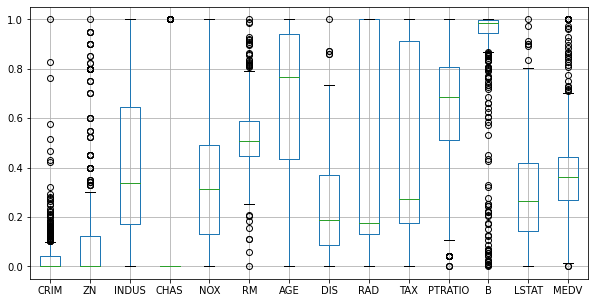

In [ ]:
df_sc.boxplot(figsize=(10,5))
plt.show()

In [ ]:
df_sc.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [ ]:
x=df_sc.drop('MEDV',axis=1)
x.shape

(506, 13)

In [ ]:
y=df_sc['MEDV']
y.shape

(506,)

In [ ]:
# train_test_split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((486, 13), (20, 13), (486,), (20,))

In [ ]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

In [ ]:
#first input and first hidden layer
model=Sequential()
model.add(Dense(20,input_dim=13,activation='relu'))
#second hidden layer
model.add(Dense(10,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [ ]:
#compile ANN
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
#fit and display the summary
model.fit(X_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.0000e+00
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.0000e+00
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.0035
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.0059
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.0136
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.0294
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.0184
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.0179
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0199
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Testing the test dataset
y_pred=model.predict(X_test)
y_pred

array([[0.43281072],
       [0.58178353],
       [0.28566942],
       [0.35922912],
       [0.2554425 ],
       [0.3090531 ],
       [0.30312258],
       [0.20552133],
       [0.43890667],
       [0.32499382],
       [0.35010844],
       [0.29455158],
       [0.10936481],
       [0.33812317],
       [0.3058916 ],
       [0.3763676 ],
       [0.30036548],
       [0.12769191],
       [0.9099966 ],
       [0.2093772 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score

In [ ]:
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 0.003677225732378363


In [ ]:
score=model.evaluate(X_test,y_test,verbose=0)
score[0]

0.0036772270686924458

In [ ]:
#### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
y_pred_lr

array([ 0.53757571,  0.69413989,  0.19982562,  0.43719568,  0.30371686,
        0.40297251,  0.28110145,  0.19090291,  0.40571633,  0.34528995,
        0.44788623,  0.31011214, -0.22754202,  0.36457907,  0.32428455,
        0.46024547,  0.34932112,  0.02768714,  0.79164754,  0.27885285])

In [ ]:
mse=mean_squared_error(y_test,y_pred_lr)
mse

0.009724133500048315

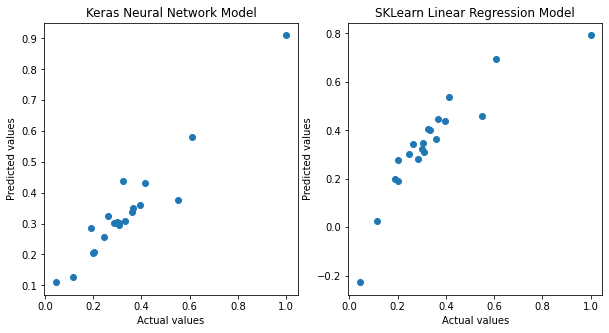

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Keras Neural Network Model")

plt.subplot(122)
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()